<a href="https://colab.research.google.com/github/josevallep1/Machine-Learning-I/blob/main/MACHINE_LEARNING_NRC_407_SEMANA8_EQUPO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACHINE LEARNING NRC-407 - SEMANA 8

## DATASET CÁNCER DE MAMA - (Random Forest y Regresión Logística)

## ***Sobre el data set:***

Base de datos [Breast Cancer Dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)

(Predicción de clasificación binaria para el tipo de cáncer de mama)
### **Identificacion de los datos:**

El cáncer de mama es el cáncer más común entre las mujeres del mundo. Representa el 25 % de todos los casos de cáncer y afectó a más de 2,1 millones de personas solo en 2015. Comienza cuando las células de la mama comienzan a crecer sin control. Estas células suelen formar tumores que se pueden ver mediante rayos X o palpar como bultos en el área de la mama.

Los desafíos clave para su detección son cómo clasificar los tumores en malignos (cancerosos) o benignos (no cancerosos).

**Descripcion de la data:**

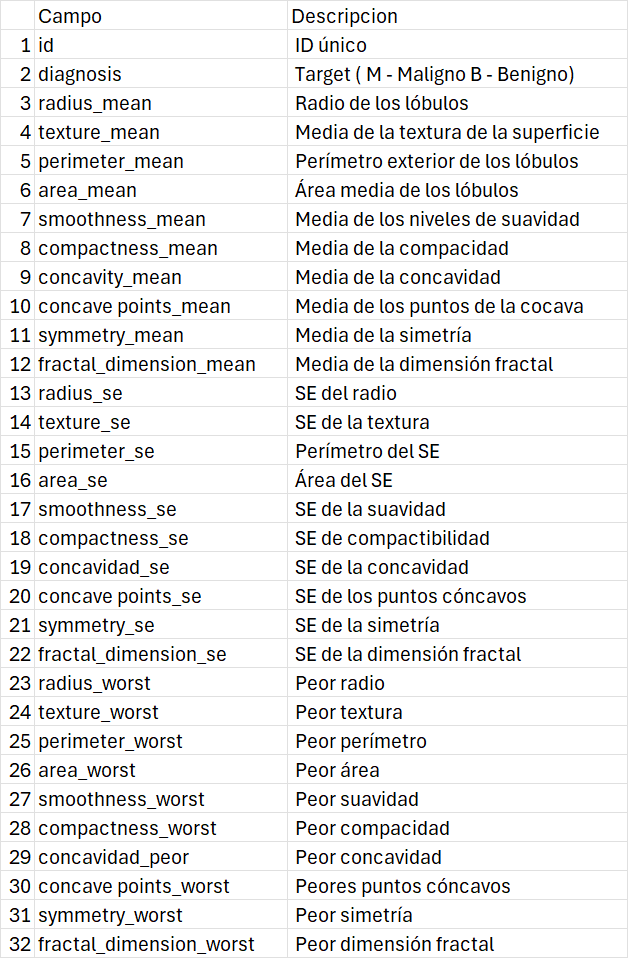

### **Referencia:**
* kaggle. Breast Cancer Dataset.: Recuperado de https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data?select=breast-cancer.csv

### IMPORTACIÓN LIBRERIAS Y DATASET

Importamos las librerías necesarias para el desarrollo de esta actividad, además se carga el dataset directamente desde un url de descarga directa.

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 1. Cargamos el dataset de cáncer de mama desde un link de descarga directa y visualizar los datos
url = "https://drive.google.com/uc?id=1xXeiLMUUZjynyCQBIb4cB5XsWfUZP853"
data = pd.read_csv(url)

nRow, nCol = data.shape
# imprimimos un mensaje indicando la dimencion de la data
print(f'Hay {nRow} Filas y {nCol} Columnas')

Hay 569 Filas y 32 Columnas


### ANÁLISIS DESCRIPTIVO
A continuación, vamos a realizar el análisis descriptivo y exploratorio del Dataset. Primero verificamos la estructura del conjunto de datos para visualizar cómo es su estructura.

In [ ]:
# Verificamos las primeras filas del dataset para confirmar la estructura
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

Ahora, vamos a verificar si hay valores faltantes o nulos mediante el método *info()*. Observamos que ninguna columna contiene valores nulos. Tambien podemos ver que todas las columnas son de tipo numéricas, excepto la columna *diagnosis* que es de tipo texto, por lo cual es una columna categórica.

In [ ]:
# Validamos que los datos no tengan valores nulos
# Tambien validamos el tipo de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Luego, vamos a verificar si hay filas duplicadas, ya que la duplicidad de datos puede introducir ruido al modelo o sobre entrenarlo, pero vemos que no hay datos duplicados.

In [ ]:
data.duplicated().sum()

0

Ahora vamos a hacer un análisis descriptivo del conjunto de datos, con el fin de visualizar algunas de sus estadísicas. Se observa que los datos no se encuentran normalizados, ya que están en diferentes escalas.

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Con el fin de visualizar el comportamiento de los datos y entre qué valores se mueven, vamos a realizar un histograma por cada una de las columnas:

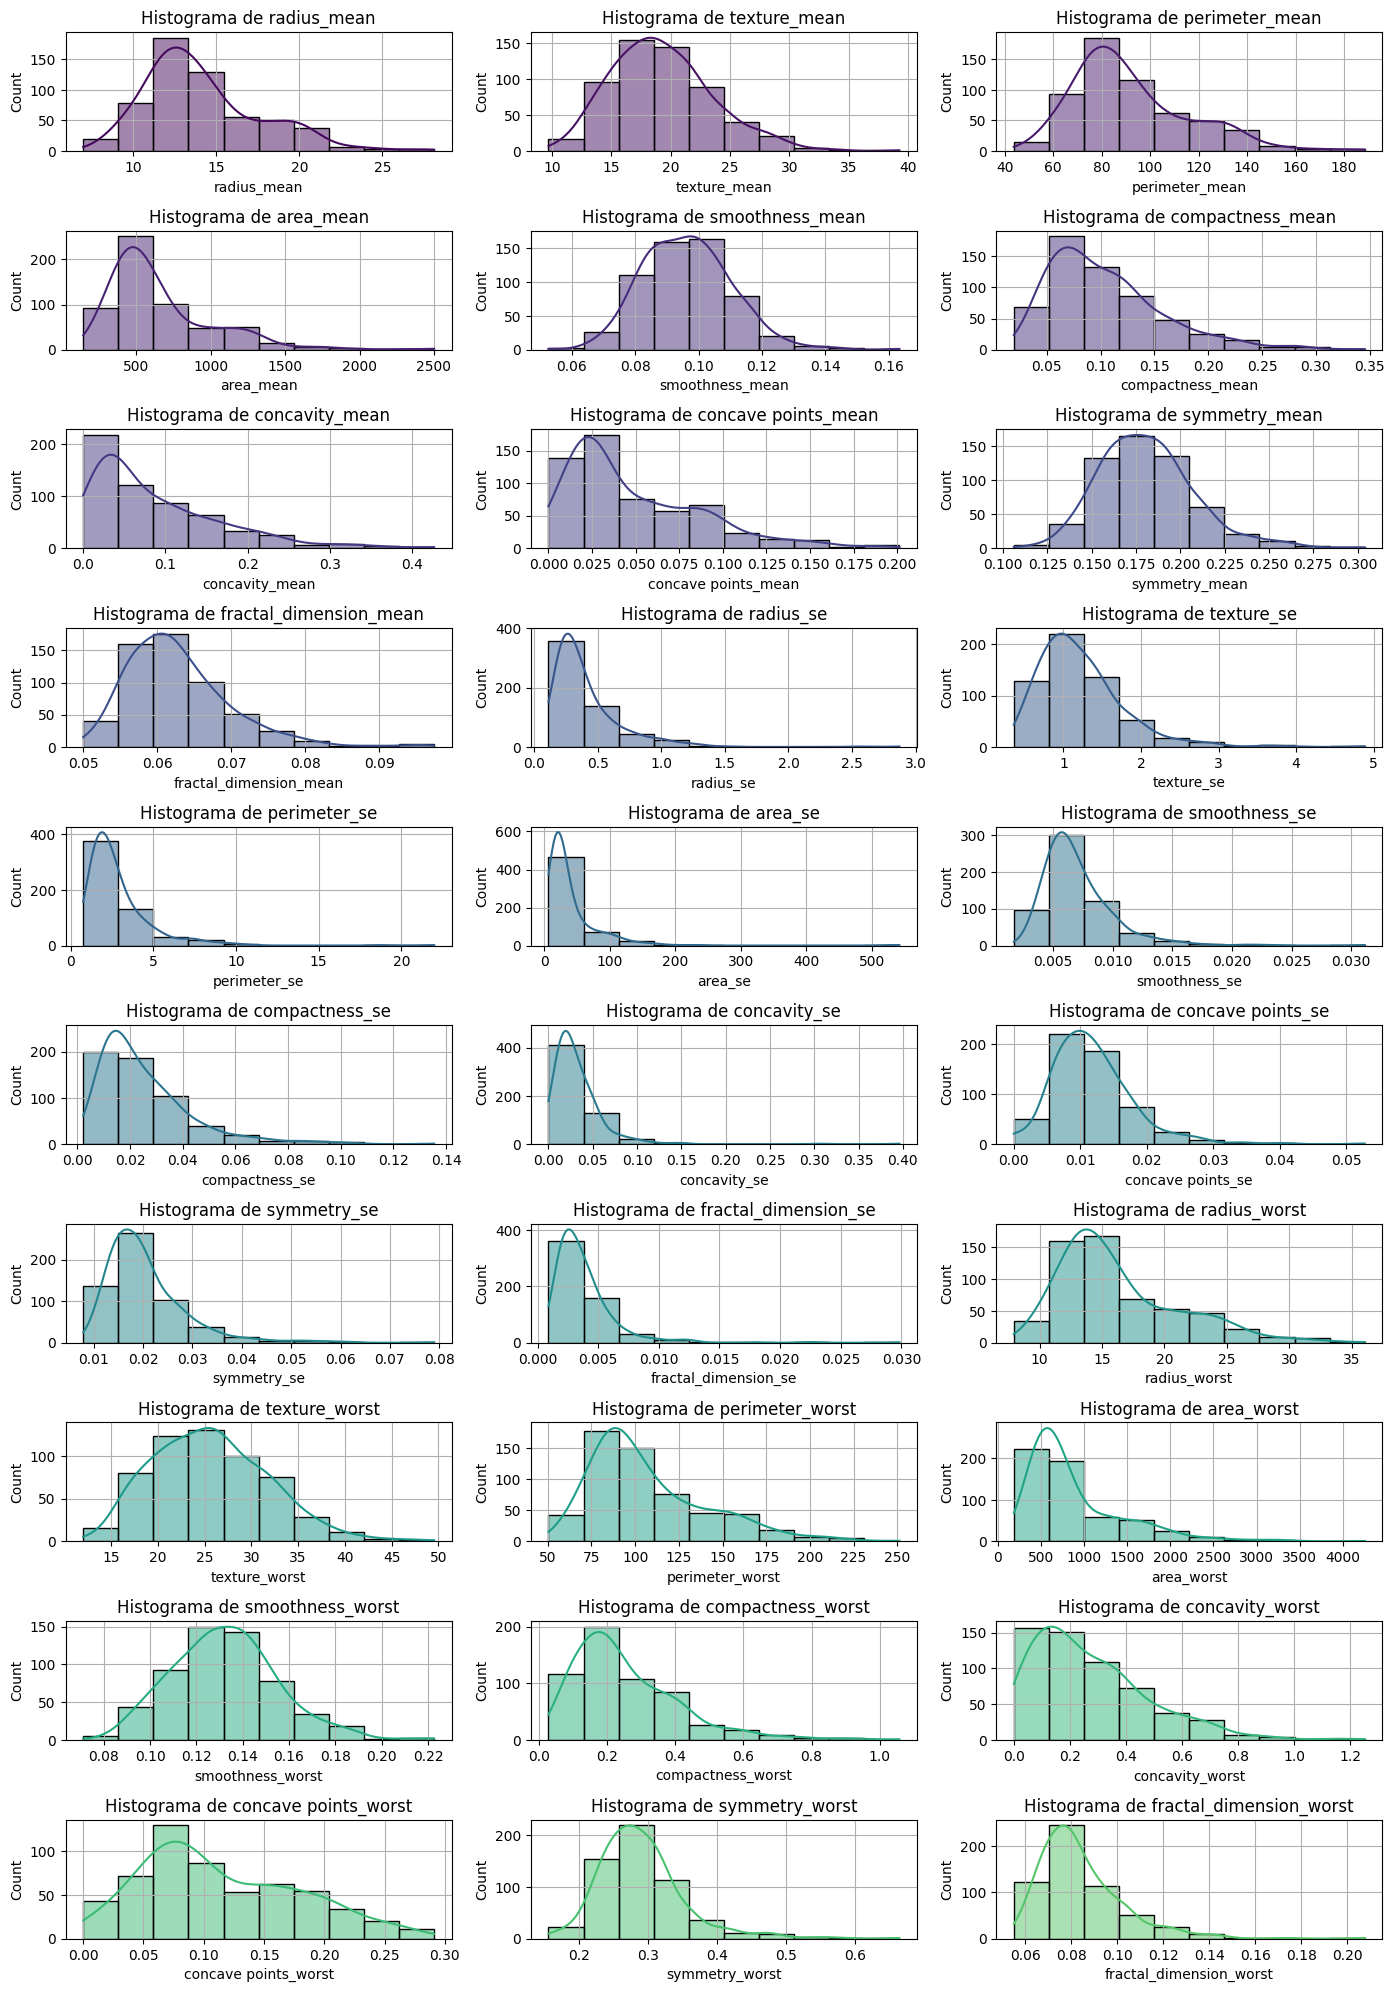

In [ ]:
# Crear una figura con una cuadrícula de 11x3 subplots
fig, axes = plt.subplots(nrows = 10, ncols=3, figsize=(14, 20))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Se define la paleta de colores
colors = sns.color_palette("viridis", 40)

# Graficar los histogramas en un ciclo
for i, column in enumerate(data.drop(columns = ["id","diagnosis"])):
    sns.histplot(data = data.drop(columns = ["id","diagnosis"]), x = column, kde = True, bins = 10, ax = axes[i], color = colors[i])
    axes[i].set_title(f'Histograma de {column}')
    axes[i].grid(True)  # Agregar la cuadrícula a cada subplot


# Ajustar el diseño
plt.tight_layout(pad=1.0)
plt.show()

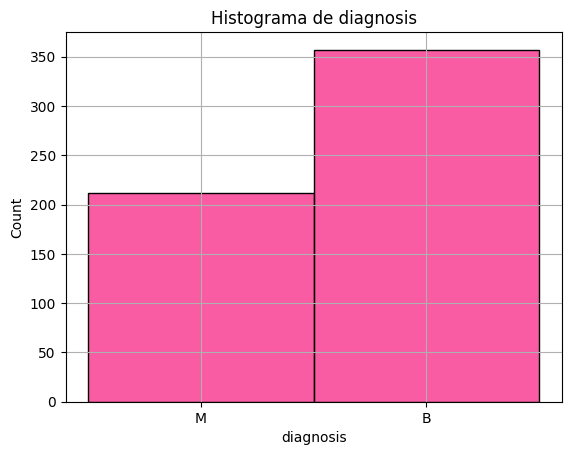

In [ ]:
plt.title("Histograma de diagnosis")
sns.histplot(data = data["diagnosis"], color = "#f72585")
plt.grid()

Confirmamos que los datos no están normalizados, ya que no son simétricos ni se mueven alrdedor de su media, por lo tanto, es necesario normalizarlos más adelante. También vemos que las clases están desbalanceadas, ya que hay más datos Benignos que Malignos.

### PROCESAMIENTO DE DATOS

Ya que no hay valores null no es necesario eliminarlos, pero si vamos a eliminar la columna id ya que no será necesaria para esta actividad. También codificamos la columna *diagnosis* en valores numéricos: 0 para 'B' (benigno) y 1 para 'M' (maligno), esto permite ejecutar más fácilmente el algoritmo.

In [ ]:
# Eliminamos la columna 'id' porque no es relevante para el modelo
data.drop(['id'], axis=1, inplace = True)

# Convertimos la columna 'diagnosis' en valores numéricos: 0 para 'B' (benigno) y 1 para 'M' (maligno)
data['diagnosis'] = data['diagnosis'].replace({'B': 0, 'M': 1})

data.head(4)

<ipython-input-46-cfa2fdd51a7a>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'] = data['diagnosis'].replace({'B': 0, 'M': 1})


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


Ahora, vamos a normalizar los datos para que todos queden en la misma escala.

In [ ]:
# Se inicializa el escalador
scaler = MinMaxScaler()

# Normalizar los datos
datos_normalizados = scaler.fit_transform(data)

# Se crea un nuevo dataframe con los datos normalizados
df_norm = pd.DataFrame(datos_normalizados, columns = data.columns)
df_norm.head(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711


In [ ]:
# Estadísticas del dataframe normalizado
df_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.0,0.000000,0.000000,1.000000,1.0
radius_mean,569.0,0.338222,0.166787,0.0,0.223342,0.302381,0.416442,1.0
texture_mean,569.0,0.323965,0.145453,0.0,0.218465,0.308759,0.408860,1.0
perimeter_mean,569.0,0.332935,0.167915,0.0,0.216847,0.293345,0.416765,1.0
area_mean,569.0,0.216920,0.149274,0.0,0.117413,0.172895,0.271135,1.0
smoothness_mean,569.0,0.394785,0.126967,0.0,0.304595,0.390358,0.475490,1.0
compactness_mean,569.0,0.260601,0.161992,0.0,0.139685,0.224679,0.340531,1.0
concavity_mean,569.0,0.208058,0.186785,0.0,0.069260,0.144189,0.306232,1.0
concave points_mean,569.0,0.243137,0.192857,0.0,0.100944,0.166501,0.367793,1.0
symmetry_mean,569.0,0.379605,0.138456,0.0,0.282323,0.369697,0.453030,1.0


Un gráfico muy útil a la hora de visualizar si tenemos datos atípicos (o outliers), es el gráfico de Caja, ya que nos muestra la distribución de datos mediante sus Cuantiles principales, y cómo se distribuyen los datos que están por fuera de estos cuantiles, es decir, los datos más alejados que se pueden denominar atípicos. Este gráfico se puede realizar para cada una de las columnas numéricas mediante la librería *Seaborn*, y podemos personalizar su orientación, título, paleta de colores, entre otros (Waskom, 2024).

<Axes: >

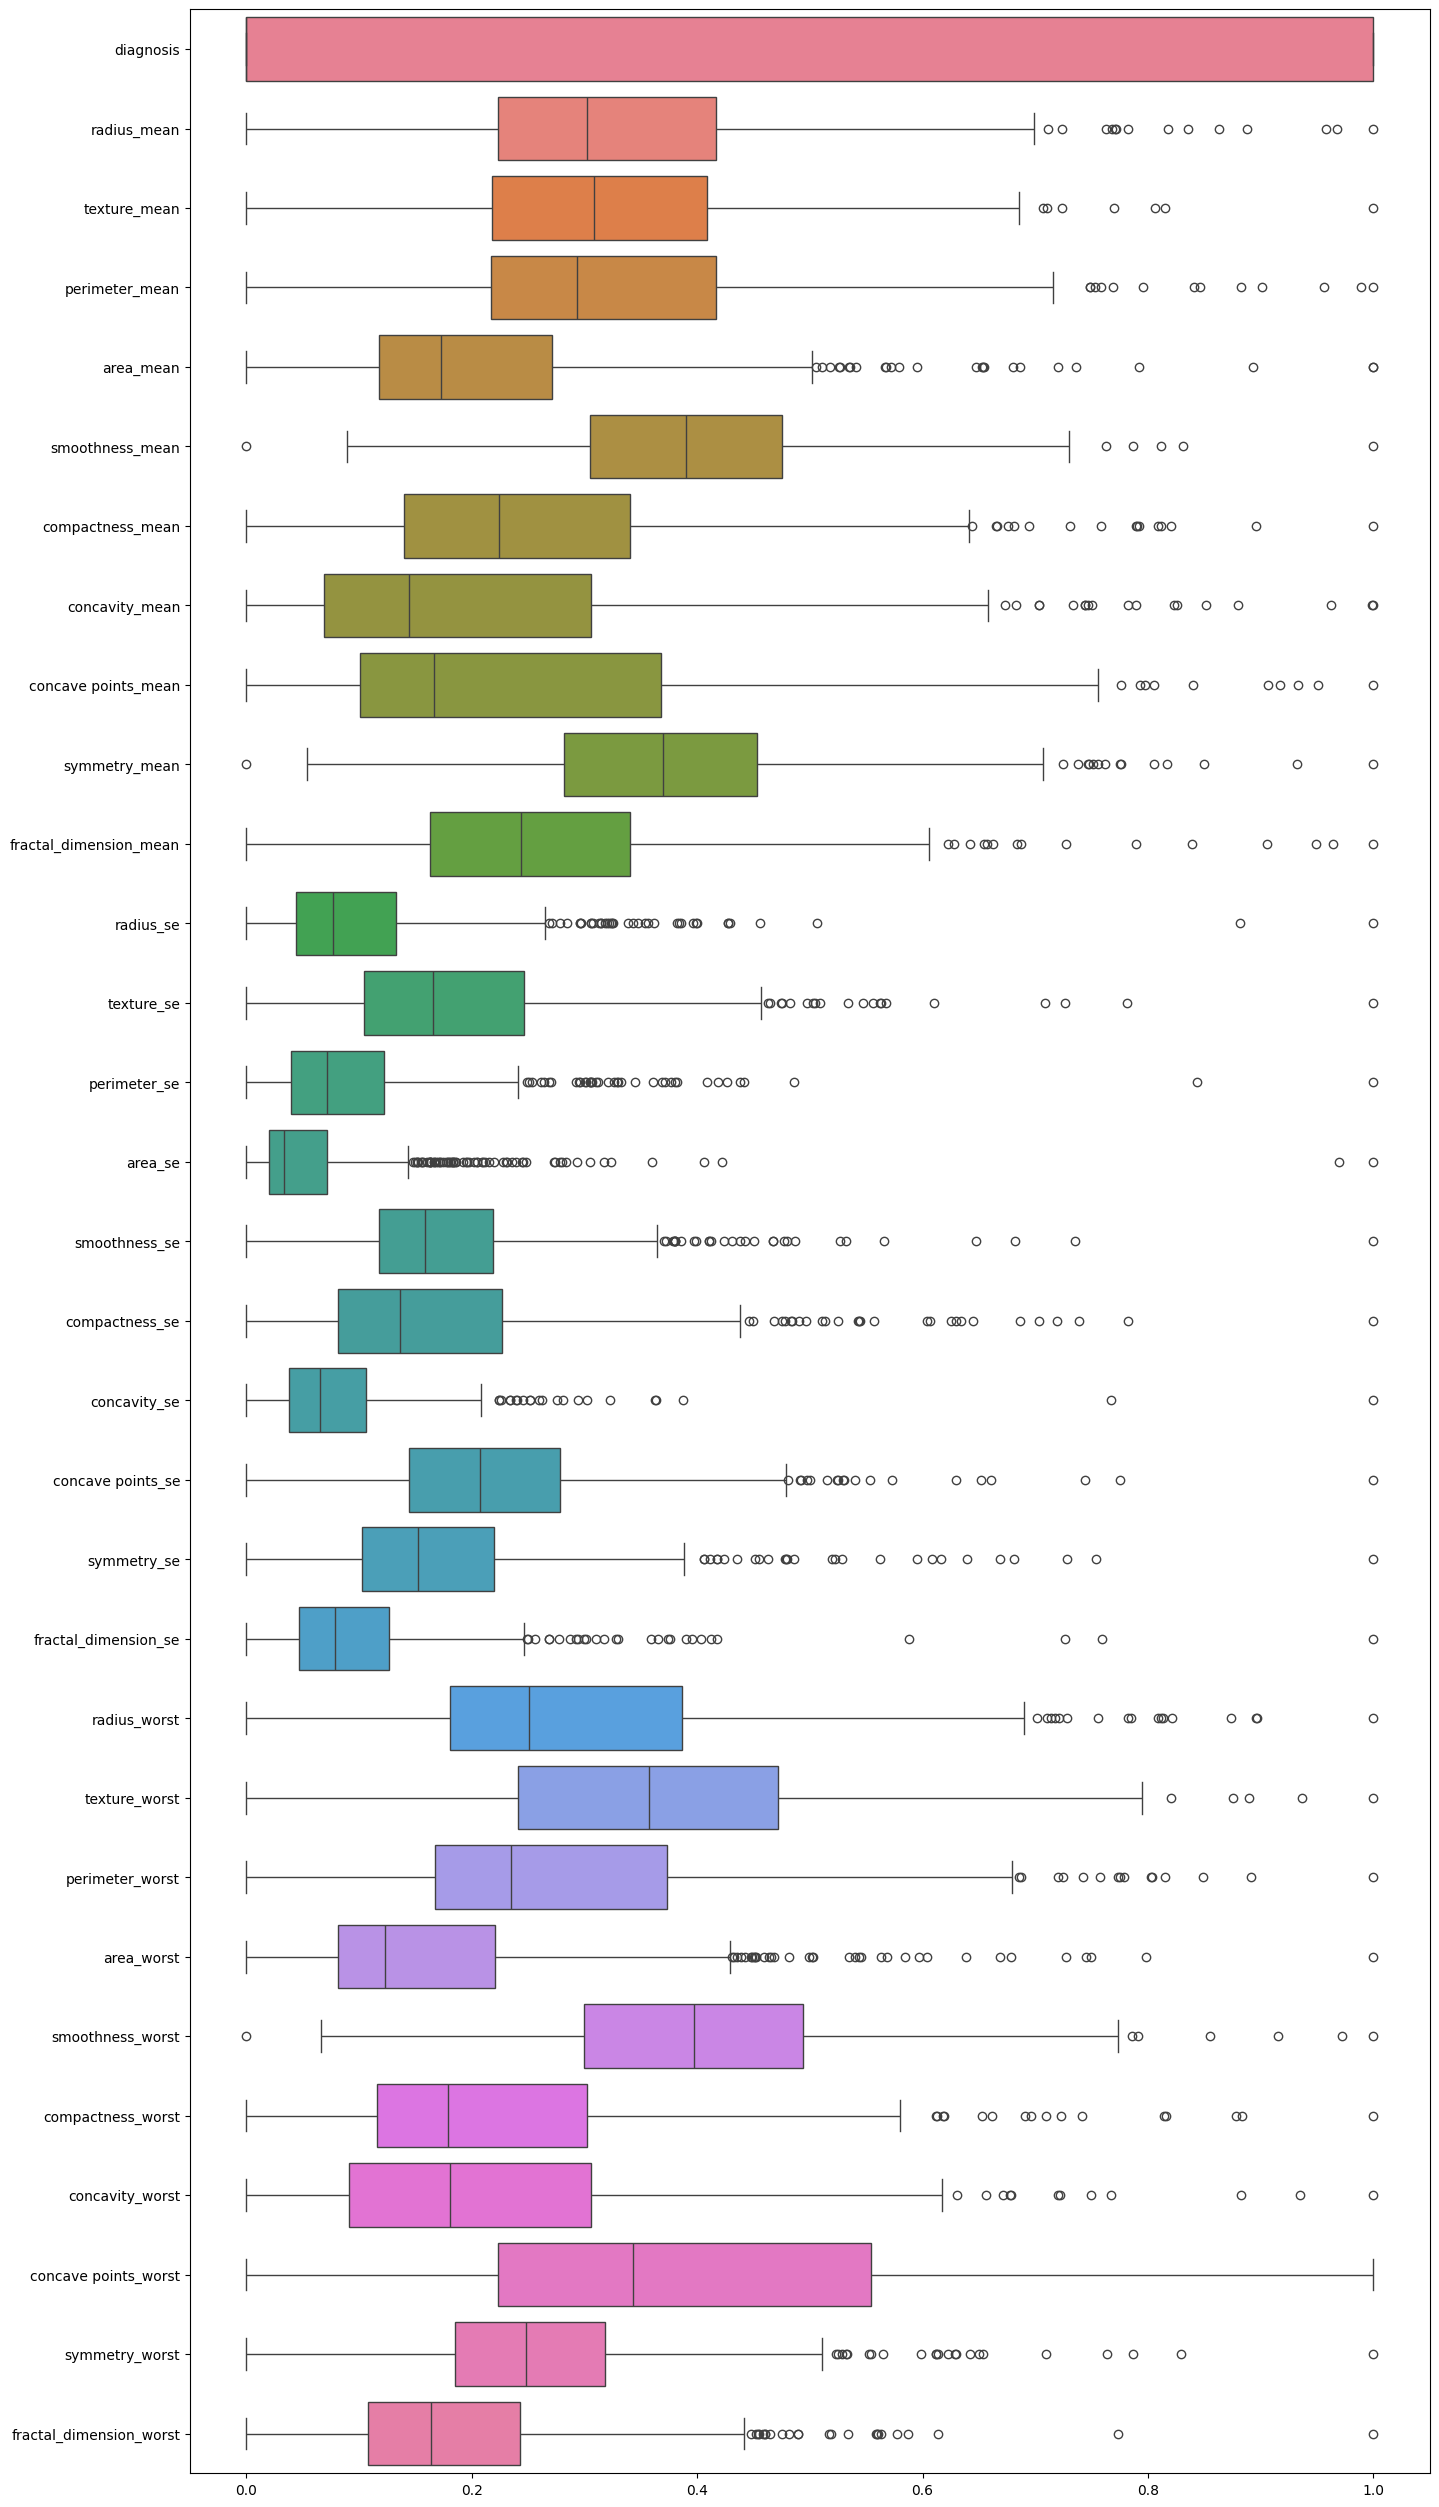

In [ ]:
# gráfico de caja
plt.figure(figsize = (16, 32))
sns.boxplot(df_norm, orient='h')

Observamos que la mayoría de variables presentan outliers, más para la derecha que para la izquierda. Vamos a eliminar estos datos atípicos, para que no nos generen ruido en los diferentes casos de uso, y vamos a graficar de nuevo el diagrama de Caja para ver cómo se distribuyen los datos filtrados.
Para esto, primero calculamos el primer y el tercer cuartil (Q1 y Q3), y calculamos la diferencia entre ambos, el cual se denomina rango intercuartilico. Luego se definen los límites superior e inferior como el cuartil mas/menos 1.5 el rango intercuartilico, y esos son los valores entre los cuales van a estar mis datos, los que se salgan de los límites superior e inferior serán considerados outliers.

In [ ]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_norm.quantile(0.25)
Q3 = df_norm.quantile(0.75)
IQR = Q3 - Q1
print(f"Rango Intercuartilico: \n{IQR}")

# Definir los límites inferior y superior
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

Rango Intercuartilico: 
diagnosis                  1.000000
radius_mean                0.193100
texture_mean               0.190396
perimeter_mean             0.199917
area_mean                  0.153722
smoothness_mean            0.170895
compactness_mean           0.200847
concavity_mean             0.236973
concave points_mean        0.266849
symmetry_mean              0.170707
fractal_dimension_mean     0.177338
radius_se                  0.089263
texture_se                 0.141465
perimeter_se               0.082505
area_se                    0.051065
smoothness_se              0.101200
compactness_se             0.145477
concavity_se               0.068081
concave points_se          0.133965
symmetry_se                0.117071
fractal_dimension_se       0.079806
radius_worst               0.205621
texture_worst              0.230277
perimeter_worst            0.205638
area_worst                 0.139771
smoothness_worst           0.194149
compactness_worst          0.186182
conc

<ipython-input-58-83f8142c4ea3>:6: UserWarning: 
The palette list has fewer values (30) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(df_filtered, orient='h', palette = colors)


Text(0.5, 1.0, 'Diagrama de caja sin Outliers')

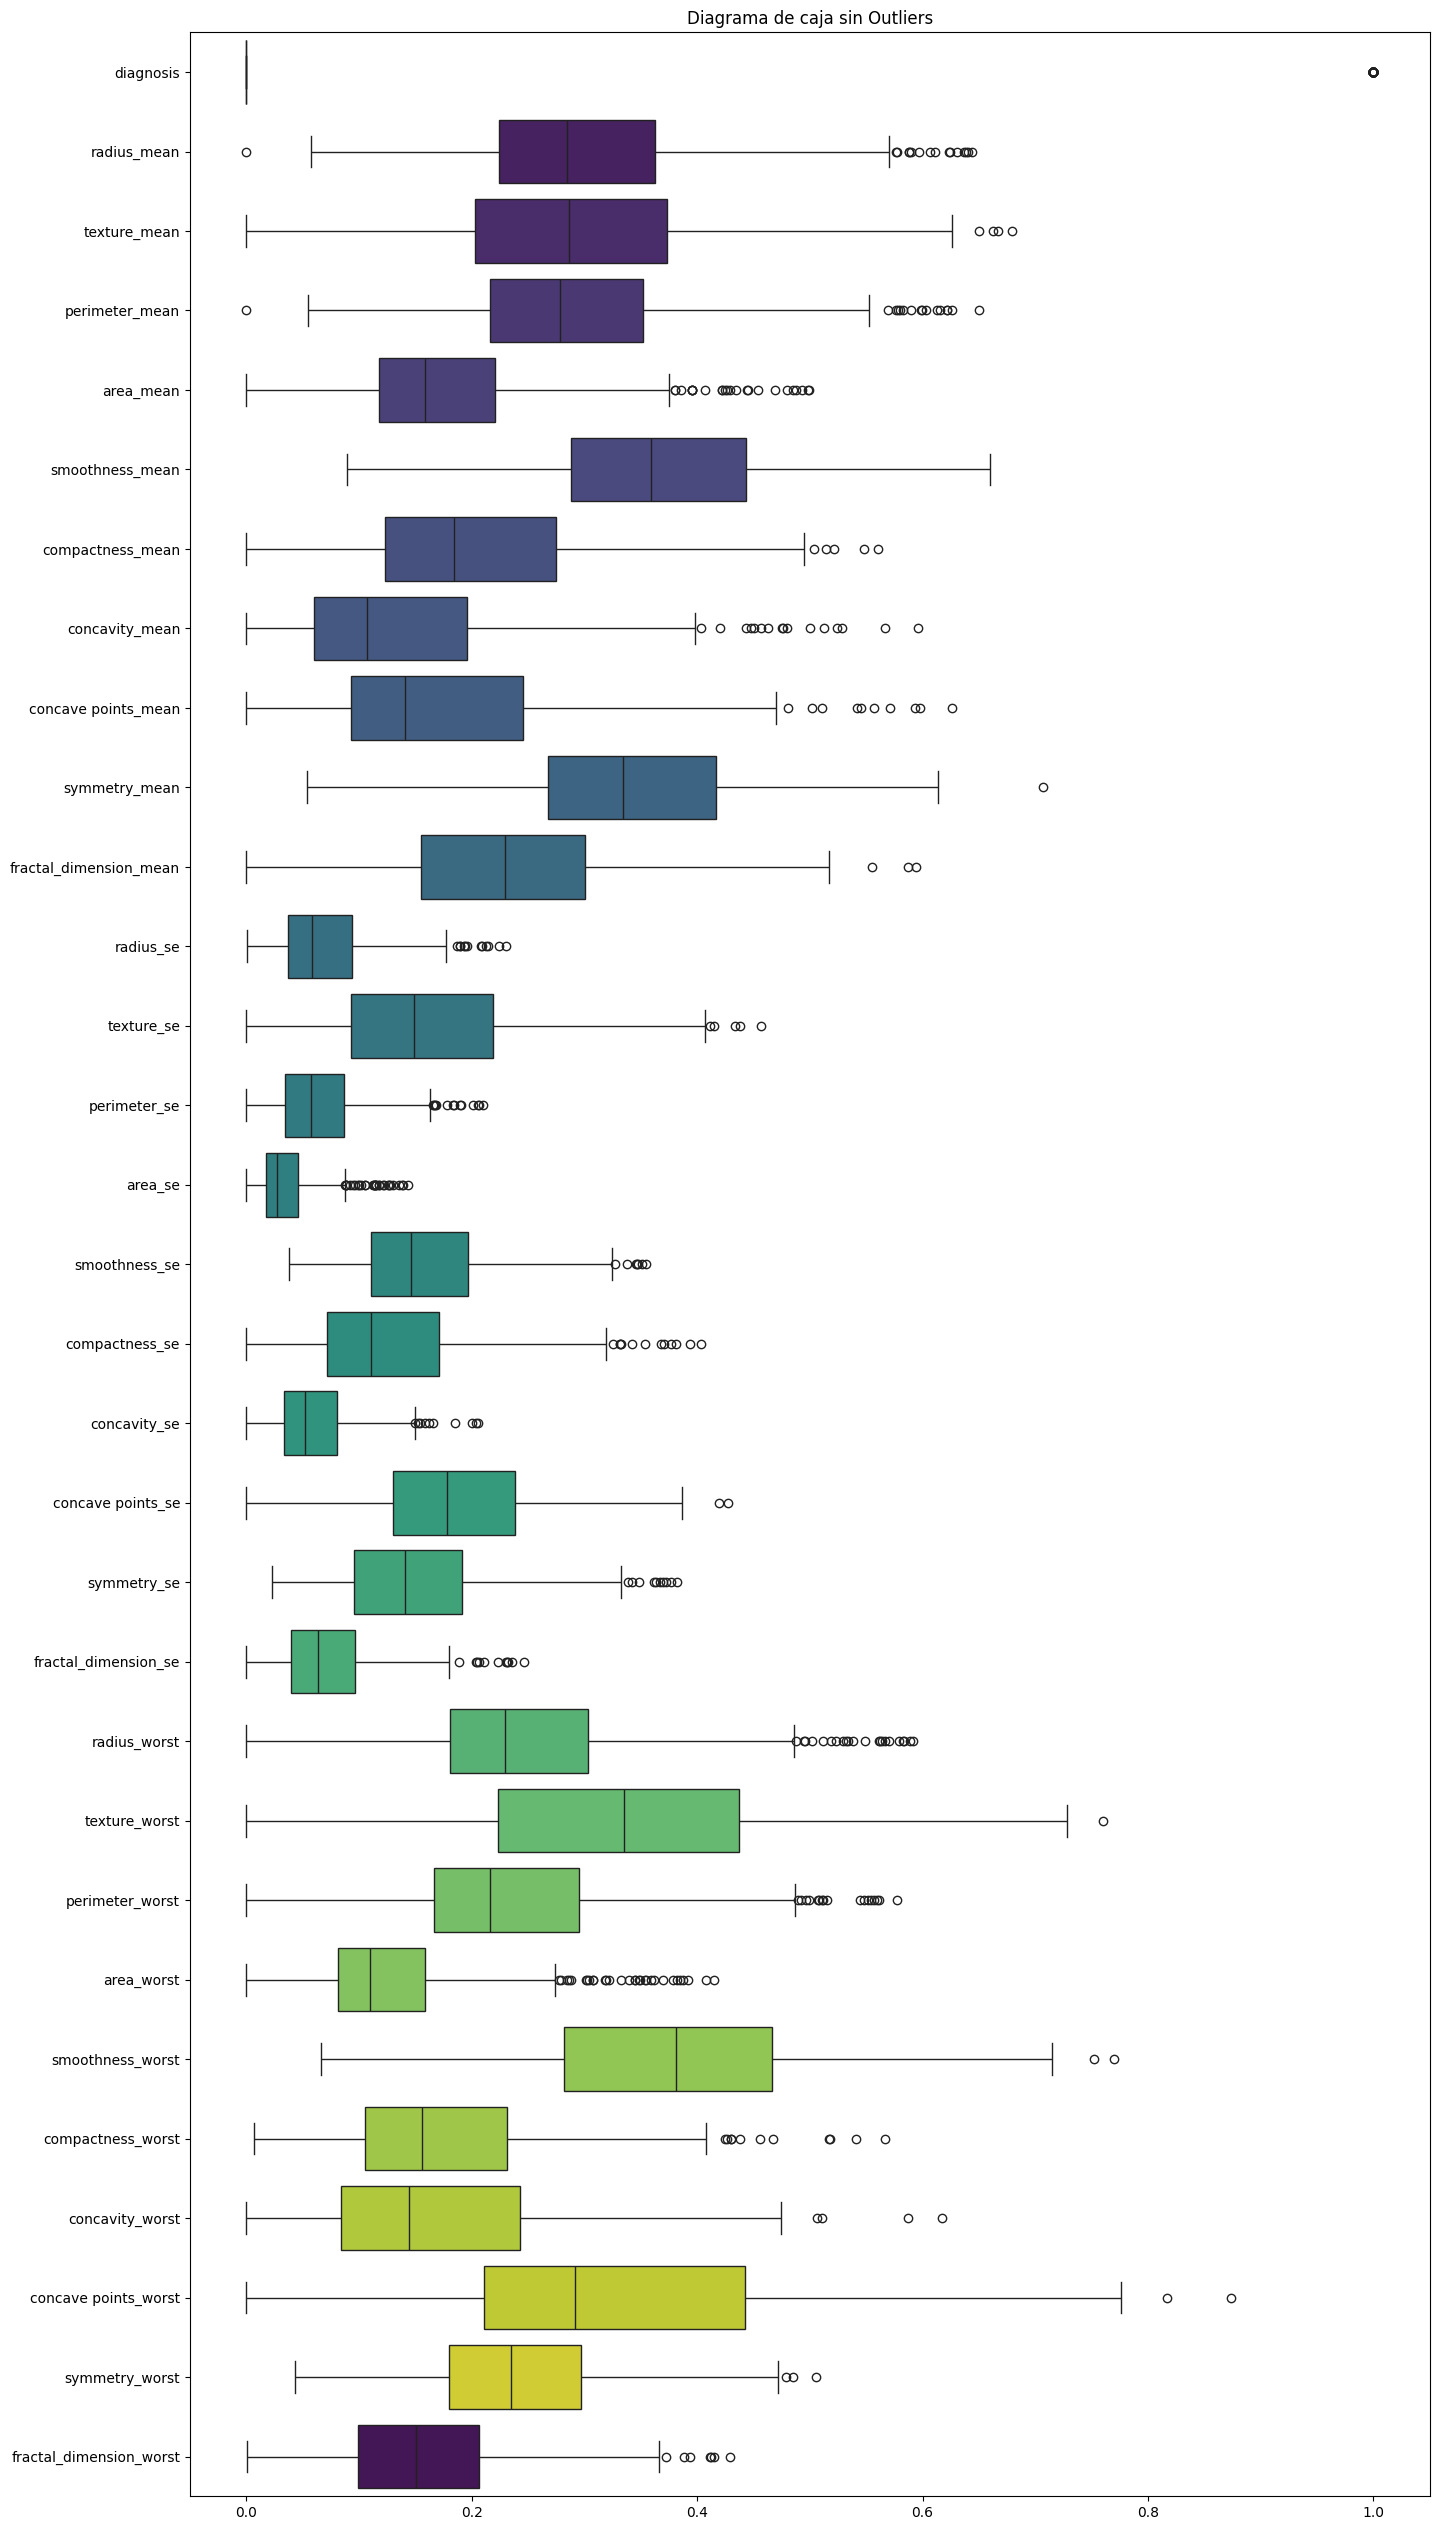

In [ ]:
# Filtrar el DataFrame para eliminar los outliers
df_filtered = df_norm[~((df_norm < limite_inf) | (df_norm > limite_sup)).any(axis=1)]

# gráfico de caja para el dataframe filtrado
plt.figure(figsize = (16, 32))
sns.boxplot(df_filtered, orient='h', palette = colors)
plt.title('Diagrama de caja sin Outliers')

Ahora, vamos a analizar qué tan correlacionadas están unas variables de otras mediante los coeficientes de correlación de Pearson. La correlación de Pearson nos indica en qué porcentaje dos variables son linealmente dependientes (Cady, 2017), ya sea directa o inversamente, y nos ayuda a tomar decisiones sobre qué tan necesario puede ser tener una variable dentro de mi conjunto de características.

## ***Aplicacion de modelo de Bosques Aleatorios:***
Como los datos estan etiquetados, usamos el model de Bosques Aleatorios para realizar una clasificaicon de datos, este modelo esta basado en árboles de decisión entrenados aleatoriamente con el objetivo de disminuir la varianza y evitar sobre-entrenamiento.

### ENTORNOS DE ENTRENAMIENTO
Dividimos los datos en conjuntos de entrenamiento y prueba

In [ ]:
# Separaramos las características (X) y la etiqueta (y)
X = data.drop('diagnosis', axis=1)  # Variables predictoras
y = data['diagnosis']               # Variable objetivo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### ENTRENAMIENTO RANDOM FOREST

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### PREDICCIONES DE PRUEBA Y EVALUACIÓN DEL MODELO
Realizamos predicciones en el conjunto de prueba

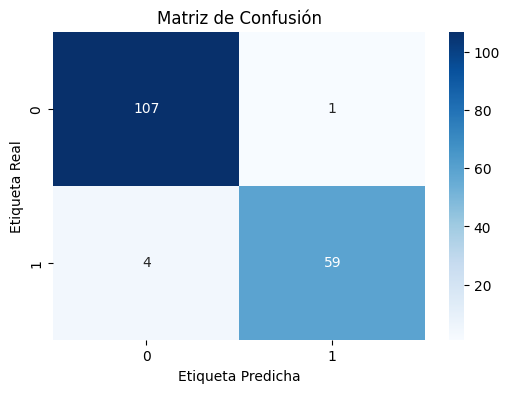

In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase "maligno"
# 6.1 Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()

In [ ]:
# Medimos la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")

Exactitud del modelo: 97.08%


In [ ]:
# Generamos un Reporte de Clasificación (Precisión, Recall, F1-Score)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



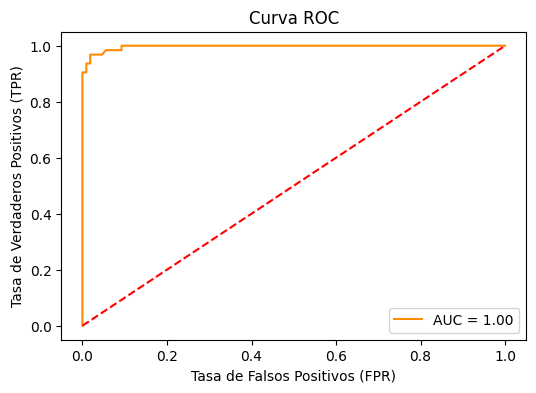

In [ ]:
# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.show()